<a href="https://colab.research.google.com/github/jhchang/MLPredictHrsWorked/blob/master/MLPredictHrsWorked.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## This project is based on Google's Machine Learning course

I will be working with the [Adult Census Income dataset](https://archive.ics.uci.edu/ml/datasets/Census+Income), which is commonly used in machine learning literature. This data was extracted from the [1994 Census bureau database](http://www.census.gov/en.html) by Ronny Kohavi and Barry Becker.

Each example in the dataset contains the following demographic data for a set of individuals who took part in the 1994 Census:

### Numeric Features
*   `age`: The age of the individual in years.
*   `fnlwgt`: The number of individuals the Census Organizations believes that set of observations represents.
*   `education_num`:  An enumeration of the categorical representation of education. The higher the number, the higher the education that individual achieved. For example, an `education_num` of `11` represents `Assoc_voc` (associate degree at a vocational school), an `education_num` of `13` represents `Bachelors`, and an `education_num` of `9` represents `HS-grad` (high school graduate).
*   `capital_gain`: Capital gain made by the individual, represented in US Dollars.
*   `capital_loss`: Capital loss mabe by the individual, represented in US Dollars.

### Categorical Features
*   `workclass`: The individual's type of employer. Examples include: `Private`, `Self-emp-not-inc`, `Self-emp-inc`, `Federal-gov`, `Local-gov`, `State-gov`, `Without-pay`, and `Never-worked`.
*   `education`: The highest level of education achieved for that individual.
*   `marital_status`: Marital status of the individual. Examples include: `Married-civ-spouse`, `Divorced`, `Never-married`, `Separated`, `Widowed`, `Married-spouse-absent`, and `Married-AF-spouse`.
*   `occupation`: The occupation of the individual. Example include: `tech-support`, `Craft-repair`, `Other-service`, `Sales`, `Exec-managerial` and more.
*   `relationship`:  The relationship of each individual in a household. Examples include: `Wife`, `Own-child`, `Husband`, `Not-in-family`, `Other-relative`, and `Unmarried`.
*   `gender`:  Gender of the individual available only in binary choices: `Female` or `Male`.
*   `race`: `White`, `Asian-Pac-Islander`, `Amer-Indian-Eskimo`, `Black`, and `Other`. 
*   `native_country`: Country of origin of the individual. Examples include: `United-States`, `Cambodia`, `England`, `Puerto-Rico`, `Canada`, `Germany`, `Outlying-US(Guam-USVI-etc)`, `India`, `Japan`, `United-States`, `Cambodia`, `England`, `Puerto-Rico`, `Canada`, `Germany`, `Outlying-US(Guam-USVI-etc)`, `India`, `Japan`, and more.

### Prediction Task
The prediction task is to determine how many hours someone works per week

### Label
*   `hours_per_week`: Hours worked per week.

### Notes on Data Collection

All the examples extracted for this dataset meet the following conditions: 
*   `age` is 16 years or older.
*   The adjusted gross income (used to calculate `income_bracket`) is greater than $100 USD annually.
*   `fnlwgt` is greater than 0.
*   `hours_per_week` is greater than 0.






## Setup

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%tensorflow_version 1.x
import tensorflow as tf
import tempfile
!pip install seaborn==0.8.1
import seaborn as sns
import itertools
#from sklearn.metrics import confusion_matrix
#from sklearn.metrics import roc_curve, roc_auc_score
#from sklearn.metrics import precision_recall_curve
from sklearn import metrics

from google.colab import widgets
# For facets
from IPython.core.display import display, HTML
import base64
!pip install facets-overview==1.0.0
from facets_overview.feature_statistics_generator import FeatureStatisticsGenerator

from __future__ import print_function

import math

from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
from tensorflow.python.data import Dataset

tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format


print('Modules are imported.')

Modules are imported.


### Load the Adult Dataset
Load and convert the data into pandas dataframes

In [2]:
COLUMNS = ["age", "workclass", "fnlwgt", "education", "education_num",
           "marital_status", "occupation", "relationship", "race", "gender",
           "capital_gain", "capital_loss", "hours_per_week", "native_country",
           "income_bracket"]

train_df = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",
    names=COLUMNS,
    sep=r'\s*,\s*',
    engine='python',
    na_values="?")
test_df = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test",
    names=COLUMNS,
    sep=r'\s*,\s*',
    skiprows=[0],
    engine='python',
    na_values="?")

# Drop rows with missing values
train_df = train_df.dropna(how="any", axis=0)
test_df = test_df.dropna(how="any", axis=0)

train_df = train_df.reindex(np.random.permutation(train_df.index))

print('UCI Adult Census Income dataset loaded.')


UCI Adult Census Income dataset loaded.


In [3]:
#@title Visualize the Data in Facets
fsg = FeatureStatisticsGenerator()
dataframes = [
    {'table': train_df, 'name': 'trainData'}]
censusProto = fsg.ProtoFromDataFrames(dataframes)
protostr = base64.b64encode(censusProto.SerializeToString()).decode("utf-8")


HTML_TEMPLATE = """<script src="https://cdnjs.cloudflare.com/ajax/libs/webcomponentsjs/1.3.3/webcomponents-lite.js"></script>
        <link rel="import" href="https://raw.githubusercontent.com/PAIR-code/facets/1.0.0/facets-dist/facets-jupyter.html">
        <facets-overview id="elem"></facets-overview>
        <script>
          document.querySelector("#elem").protoInput = "{protostr}";
        </script>"""
html = HTML_TEMPLATE.format(protostr=protostr)
display(HTML(html))

In [4]:
#@title Set the Number of Data Points to Visualize in Facets Dive

SAMPLE_SIZE = 2500 #@param
  
train_dive = train_df.sample(SAMPLE_SIZE).to_json(orient='records')

HTML_TEMPLATE = """<script src="https://cdnjs.cloudflare.com/ajax/libs/webcomponentsjs/1.3.3/webcomponents-lite.js"></script>
        <link rel="import" href="https://raw.githubusercontent.com/PAIR-code/facets/1.0.0/facets-dist/facets-jupyter.html">
        <facets-dive id="elem" height="600"></facets-dive>
        <script>
          var data = {jsonstr};
          document.querySelector("#elem").data = data;
        </script>"""
html = HTML_TEMPLATE.format(jsonstr=train_dive)
display(HTML(html))

In [5]:
#@title Categorical Feature Columns

# Since we don't know the full range of possible values with occupation and
# native_country, we'll use categorical_column_with_hash_bucket() to help map
# each feature string into an integer ID.
occupation = tf.feature_column.categorical_column_with_hash_bucket(
    "occupation", hash_bucket_size=1000)
native_country = tf.feature_column.categorical_column_with_hash_bucket(
    "native_country", hash_bucket_size=1000)

# For the remaining categorical features, since we know what the possible values
# are, we can be more explicit and use categorical_column_with_vocabulary_list()
gender = tf.feature_column.categorical_column_with_vocabulary_list(
    "gender", ["Female", "Male"])
race = tf.feature_column.categorical_column_with_vocabulary_list(
    "race", [
        "White", "Asian-Pac-Islander", "Amer-Indian-Eskimo", "Other", "Black"
    ])
education = tf.feature_column.categorical_column_with_vocabulary_list(
    "education", [
        "Bachelors", "HS-grad", "11th", "Masters", "9th",
        "Some-college", "Assoc-acdm", "Assoc-voc", "7th-8th",
        "Doctorate", "Prof-school", "5th-6th", "10th", "1st-4th",
        "Preschool", "12th"
    ])
marital_status = tf.feature_column.categorical_column_with_vocabulary_list(
    "marital_status", [
        "Married-civ-spouse", "Divorced", "Married-spouse-absent",
        "Never-married", "Separated", "Married-AF-spouse", "Widowed"
    ])
relationship = tf.feature_column.categorical_column_with_vocabulary_list(
    "relationship", [
        "Husband", "Not-in-family", "Wife", "Own-child", "Unmarried",
        "Other-relative"
    ])
workclass = tf.feature_column.categorical_column_with_vocabulary_list(
    "workclass", [
        "Self-emp-not-inc", "Private", "State-gov", "Federal-gov",
        "Local-gov", "?", "Self-emp-inc", "Without-pay", "Never-worked"
    ])
income_bracket = tf.feature_column.categorical_column_with_vocabulary_list(
    "income_bracket", ["<=50K", ">50K"])

print('Categorical feature columns defined.')

Categorical feature columns defined.


In [6]:
#@title Numeric Feature Columns
# For Numeric features, we can just call on feature_column.numeric_column()
# to use its raw value instead of having to create a map between value and ID.
age = tf.feature_column.numeric_column("age")
fnlwgt = tf.feature_column.numeric_column("fnlwgt")
education_num = tf.feature_column.numeric_column("education_num")
capital_gain = tf.feature_column.numeric_column("capital_gain")
capital_loss = tf.feature_column.numeric_column("capital_loss")

print('Numeric feature columns defined.')

Numeric feature columns defined.


In [0]:
age_buckets = tf.feature_column.bucketized_column(
    age, boundaries=[18, 25, 30, 35, 40, 45, 50, 55, 60, 65])

In [0]:
# List of variables, with special handling for gender subgroup.
variables = [native_country, education, occupation, workclass,
             relationship, age_buckets]
subgroup_variables = [gender]
feature_columns = variables + subgroup_variables

In [9]:
deep_columns = [
    tf.feature_column.indicator_column(workclass),
    tf.feature_column.indicator_column(education),
    tf.feature_column.indicator_column(age_buckets),
    tf.feature_column.indicator_column(gender),
    tf.feature_column.indicator_column(relationship),
    tf.feature_column.indicator_column(income_bracket),
    tf.feature_column.embedding_column(native_country, dimension=8),
    tf.feature_column.embedding_column(occupation, dimension=8),
]

print(deep_columns)
print('Deep columns created.')

[IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='workclass', vocabulary_list=('Self-emp-not-inc', 'Private', 'State-gov', 'Federal-gov', 'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'), dtype=tf.string, default_value=-1, num_oov_buckets=0)), IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='education', vocabulary_list=('Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college', 'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school', '5th-6th', '10th', '1st-4th', 'Preschool', '12th'), dtype=tf.string, default_value=-1, num_oov_buckets=0)), IndicatorColumn(categorical_column=BucketizedColumn(source_column=NumericColumn(key='age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), boundaries=(18, 25, 30, 35, 40, 45, 50, 55, 60, 65))), IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='gender', vocabulary_list=('Female', 'Male'), dtype=tf.string, default_value=-1, num_oov

In [0]:
def linear_scale(series):
  min_val = series.min()
  max_val = series.max()
  scale = (max_val - min_val) / 2.0
  return series.apply(lambda x:((x - min_val) / scale) - 1.0)

In [0]:
  train_df["age"] = linear_scale(train_df["age"])
  train_df["fnlwgt"] = linear_scale(train_df["fnlwgt"])
  train_df["education_num"] = linear_scale(train_df["education_num"])
  train_df["capital_gain"] = linear_scale(train_df["capital_gain"])
  train_df["capital_loss"] = linear_scale(train_df["capital_loss"])


In [12]:
# Choose the first 12000 (out of 17000) examples for training.
trainNum = math.floor(len(train_df.index)*.70)
valNum = len(train_df.index) - trainNum


temp_exs = train_df.drop('hours_per_week', axis=1)
temp_targets = pd.DataFrame(train_df['hours_per_week'])

training_examples = temp_exs.head(trainNum)
training_targets = temp_targets.head(trainNum)

validation_examples = temp_exs.tail(valNum)
validation_targets = temp_targets.tail(valNum)

# Double-check that we've done the right thing.
print("Training examples summary:")
display(training_examples.describe())
print("Validation examples summary:")
display(validation_examples.describe())

print("Training targets summary:")
display(training_targets.describe())
print("Validation targets summary:")
display(validation_targets.describe())

Training examples summary:


,age,fnlwgt,education_num,capital_gain,capital_loss
count,21113.0,21113.0,21113.0,21113.0,21113.0
mean,-0.4,-0.8,0.2,-1.0,-1.0
std,0.4,0.1,0.3,0.2,0.2
min,-1.0,-1.0,-1.0,-1.0,-1.0
25%,-0.7,-0.9,0.1,-1.0,-1.0
50%,-0.5,-0.8,0.2,-1.0,-1.0
75%,-0.2,-0.7,0.6,-1.0,-1.0
max,1.0,1.0,1.0,1.0,1.0


Validation examples summary:


,age,fnlwgt,education_num,capital_gain,capital_loss
count,9049.0,9049.0,9049.0,9049.0,9049.0
mean,-0.4,-0.8,0.2,-1.0,-1.0
std,0.4,0.1,0.3,0.1,0.2
min,-1.0,-1.0,-1.0,-1.0,-1.0
25%,-0.7,-0.9,0.1,-1.0,-1.0
50%,-0.5,-0.8,0.2,-1.0,-1.0
75%,-0.2,-0.7,0.5,-1.0,-1.0
max,1.0,1.0,1.0,1.0,0.7


Training targets summary:


,hours_per_week
count,21113.0
mean,41.0
std,11.9
min,1.0
25%,40.0
50%,40.0
75%,45.0
max,99.0


Validation targets summary:


,hours_per_week
count,9049.0
mean,40.8
std,12.1
min,1.0
25%,40.0
50%,40.0
75%,45.0
max,99.0


In [0]:
def my_input_fn(features, targets, batch_size=1, shuffle=True, num_epochs=None):
    """Trains a neural network model.
  
    Args:
      features: pandas DataFrame of features
      targets: pandas DataFrame of targets
      batch_size: Size of batches to be passed to the model
      shuffle: True or False. Whether to shuffle the data.
      num_epochs: Number of epochs for which data should be repeated. None = repeat indefinitely
    Returns:
      Tuple of (features, labels) for next data batch
    """
    
    # Convert pandas data into a dict of np arrays.
    features = {key:np.array(value) for key,value in dict(features).items()}                                           
 
    # Construct a dataset, and configure batching/repeating.
    ds = Dataset.from_tensor_slices((features,targets)) # warning: 2GB limit
    ds = ds.batch(batch_size).repeat(num_epochs)
    
    # Shuffle the data, if specified.
    if shuffle:
      ds = ds.shuffle(10000)
    
    # Return the next batch of data.
    features, labels = ds.make_one_shot_iterator().get_next()
    return features, labels

In [0]:
def train_nn_regression_model(
    steps,
    batch_size,
    hidden_units,
    training_examples,
    training_targets,
    validation_examples,
    validation_targets,
    learning_rate,
    l1_regularization_strength,
    l2_regularization_strength):
    """Trains a neural network regression model.
  
    In addition to training, this function also prints training progress information,
    as well as a plot of the training and validation loss over time.
  
    Args:
        steps: A non-zero `int`, the total number of training steps. A training step
            consists of a forward and backward pass using a single batch.
        batch_size: A non-zero `int`, the batch size.
        hidden_units: A `list` of int values, specifying the number of neurons in each layer.
        training_examples: A `DataFrame` containing one or more columns from
            `california_housing_dataframe` to use as input features for training.
        training_targets: A `DataFrame` containing exactly one column from
            `california_housing_dataframe` to use as target for training.
        validation_examples: A `DataFrame` containing one or more columns from
            `california_housing_dataframe` to use as input features for validation.
        validation_targets: A `DataFrame` containing exactly one column from
            `california_housing_dataframe` to use as target for validation.
      
    Returns:
        A tuple `(estimator, training_losses, validation_losses)`:
            estimator: the trained `DNNRegressor` object.
            training_losses: a `list` containing the training loss values taken during training.
            validation_losses: a `list` containing the validation loss values taken during training.
    """

    periods = 10
    steps_per_period = steps / periods
  
    # Create a DNNRegressor object.
    
    """
    my_optimizer = optimizer=tf.train.ProximalAdagradOptimizer(
            learning_rate=learning_rate,
            l1_regularization_strength=l1_regularization_strength,
            l2_regularization_strength=l2_regularization_strength)
    """
    
    my_optimizer = tf.train.AdagradOptimizer(learning_rate=0.5)

    my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)
    dnn_regressor = tf.estimator.DNNRegressor(
        feature_columns=deep_columns,
        hidden_units=hidden_units,
        optimizer=my_optimizer
    )
    
  
    # Create input functions.
    training_input_fn = lambda: my_input_fn(training_examples, 
                                          training_targets['hours_per_week'], 
                                          batch_size=batch_size)
    predict_training_input_fn = lambda: my_input_fn(training_examples, 
                                                  training_targets['hours_per_week'], 
                                                  num_epochs=1, 
                                                  shuffle=False)
    predict_validation_input_fn = lambda: my_input_fn(validation_examples, 
                                                    validation_targets['hours_per_week'], 
                                                    num_epochs=1, 
                                                    shuffle=False)

    # Train the model, but do so inside a loop so that we can periodically assess
    # loss metrics.
    print("Training model...")
    print("RMSE (on training data):")
    training_rmse = []
    validation_rmse = []
    for period in range (0, periods):
        # Train the model, starting from the prior state.
        dnn_regressor.train(
            input_fn=training_input_fn,
            steps=steps_per_period
        )
        # Take a break and compute predictions.
        training_predictions = dnn_regressor.predict(input_fn=predict_training_input_fn)
        training_predictions = np.array([item['predictions'][0] for item in training_predictions])
    
        validation_predictions = dnn_regressor.predict(input_fn=predict_validation_input_fn)
        validation_predictions = np.array([item['predictions'][0] for item in validation_predictions])
    
        # Compute training and validation loss.
        training_root_mean_squared_error = math.sqrt(
            metrics.mean_squared_error(training_predictions, training_targets))
        validation_root_mean_squared_error = math.sqrt(
            metrics.mean_squared_error(validation_predictions, validation_targets))
        # Occasionally print the current loss.
        print("  period %02d : %0.2f" % (period, training_root_mean_squared_error))
        # Add the loss metrics from this period to our list.
        training_rmse.append(training_root_mean_squared_error)
        validation_rmse.append(validation_root_mean_squared_error)
  
    print("Model training finished.")

    # Output a graph of loss metrics over periods.
    plt.ylabel("RMSE")
    plt.xlabel("Periods")
    plt.title("Root Mean Squared Error vs. Periods")
    plt.tight_layout()
    plt.plot(training_rmse, label="training")
    plt.plot(validation_rmse, label="validation")
    plt.legend()

    print("Final RMSE (on training data):   %0.2f" % training_root_mean_squared_error)
    print("Final RMSE (on validation data): %0.2f" % validation_root_mean_squared_error)

    return dnn_regressor, training_rmse, validation_rmse

Training model...
RMSE (on training data):
  period 00 : 10.77
  period 01 : 10.66
  period 02 : 10.54
  period 03 : 10.52
  period 04 : 10.46
  period 05 : 10.50
  period 06 : 10.46
  period 07 : 10.40
  period 08 : 10.39
  period 09 : 10.36
Model training finished.
Final RMSE (on training data):   10.36
Final RMSE (on validation data): 11.09
Deep neural net model is done fitting.


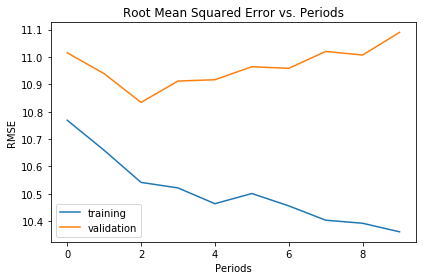

In [28]:
HIDDEN_UNITS = [20, 10] #@param
LEARNING_RATE = 0.3 #@param
L1_REGULARIZATION_STRENGTH = 0.0001 #@param
L2_REGULARIZATION_STRENGTH = 0.0001 #@param

_ = train_nn_regression_model(
    steps=5000,
    batch_size=200,
    hidden_units= HIDDEN_UNITS,
    training_examples=training_examples,
    training_targets=training_targets,
    validation_examples=validation_examples,
    validation_targets=validation_targets,
    learning_rate = LEARNING_RATE, 
    l1_regularization_strength=L1_REGULARIZATION_STRENGTH,
    l2_regularization_strength=L2_REGULARIZATION_STRENGTH)

print('Deep neural net model is done fitting.')